###  MicroGrad demo

In [11]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot,draw_nn,print_all_values
import pprint
np.random.seed(1337)
random.seed(1337)
number_of_samples=4
number_of_iterations=10
pp = pprint.PrettyPrinter(indent=4)
debug_values = False
global total_loss
global scores

In [12]:
# make up a dataset

from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=number_of_samples, noise=0.1)
pp.pprint(X)
pp.pprint(y)
y = y*2 - 1 # make y be -1 or 1
pp.pprint(y)

array([[ 0.02183808,  0.35430742],
       [ 0.82773723,  0.0961832 ],
       [-1.09199463, -0.10965849],
       [ 2.1335573 ,  0.42420399]])
array([1, 0, 0, 1])
array([ 1, -1, -1,  1])


In [13]:
# initialize a model 
# model = MLP(2, [16, 16, 1]) # 2-layer neural network
model = MLP(2, [2, 1], lastReLU=True, debug_bw=False) # 2-layer neural network
# print(model)
# pp.pprint(model.parameters())
# pp.pprint(model.layers)

Xb, yb = X, y
inputs = [list(map(Value, xrow)) for xrow in Xb]
print("inputs:")
pp.pprint(inputs)


Module nn MLP: structure [2, 2, 1]
inputs:
[   [   Value(name=v132,layernumber=,neuronnumber=,weightnumber=,type=,data=0.0218380834585633, grad=0),
        Value(name=v133,layernumber=,neuronnumber=,weightnumber=,type=,data=0.35430741854819914, grad=0)],
    [   Value(name=v134,layernumber=,neuronnumber=,weightnumber=,type=,data=0.8277372309744037, grad=0),
        Value(name=v135,layernumber=,neuronnumber=,weightnumber=,type=,data=0.09618319872606, grad=0)],
    [   Value(name=v136,layernumber=,neuronnumber=,weightnumber=,type=,data=-1.0919946290642557, grad=0),
        Value(name=v137,layernumber=,neuronnumber=,weightnumber=,type=,data=-0.1096584897551003, grad=0)],
    [   Value(name=v138,layernumber=,neuronnumber=,weightnumber=,type=,data=2.133557297233384, grad=0),
        Value(name=v139,layernumber=,neuronnumber=,weightnumber=,type=,data=0.42420399367691636, grad=0)]]


In [14]:
# loss function
def loss():
    global total_loss
    global scores
    # forward the model to get scores
    scores = list(map(model, inputs))
    print("scores")
    pp.pprint(scores)

    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

# total_loss, acc = loss()
# print(total_loss, acc)

In [15]:
def act():
    global total_loss
    # forward
    total_loss, acc = loss()
    # print("step %d loss calc" %k)
    if debug_values:
        print_all_values(total_loss)
    

In [16]:
def zero():
    global total_loss
    model.zero_grad()
    # print("step %d zero grad" %k)
    if debug_values:
        print_all_values(total_loss)
    dot=draw_dot(total_loss)
    dot

In [17]:
def back():
    global total_loss
    # backward
    total_loss.backward()
    # print("step %d backward" %k)
    if debug_values:
        print_all_values(total_loss)
    dot=draw_dot(total_loss)
    dot    

In [18]:
def upd(k):
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

In [19]:
def opt():
    # optimization
    for k in range(number_of_iterations):
        print("start step %d" %k)
        # if k % 1 == 0:
        #     print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")
        # print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")
        print(f"step {k} loss {total_loss.data}")


scores
[   Value(name=v153,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=0.016436428967818627, grad=0),
    Value(name=v167,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=-0.1346183875256753, grad=0),
    Value(name=v181,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=0.17786782634182813, grad=0),
    Value(name=v195,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=-0.3548313015504008, grad=0)]


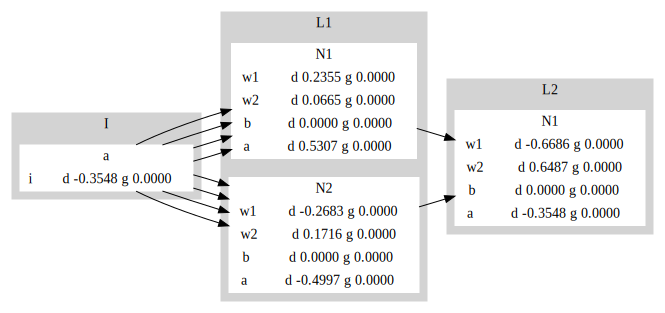

In [20]:
act()
draw_dot(total_loss)
draw_nn(scores, model)

